# Exp 5: Integrated Experiment # 
## 1.	Aims ##

#### 1. Be familiar with the operations of morphological image processing. 

#### 2. Be familiar with the operations of image segmentation.
    
#### 3. Try to design GUI in Python.

## 2.	Steps and Requirements

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_opening, binary_closing, erosion, dilation, opening, closing, square, diamond
from scipy.ndimage import binary_fill_holes
from skimage.morphology import thin, convex_hull_image
from skimage.morphology import white_tophat, black_tophat, square
from skimage.filters import threshold_otsu
from skimage import io, filters, feature
from skimage import data, feature
from scipy import ndimage
from skimage import io, color, transform

### (1) Erosion, Dilation, Opening and Closing.	

(a) Load the RGB image clock2.jpg. Convert it to grayscale and then convert it into a binary image using a threshold of 0.5.

(b) Use an SE as [1 1 1; 1 1 1; 1 1 1] to obtain the binary morphological erosion, dilation, opening and closing of the binary image. Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

(c) Use an SE as [1 0 0; 0 1 0; 0 0 1] to obtain the binary morphological erosion, dilation, opening and closing of the binary image. Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

(d) Load the RGB image zebras.jpg. Convert it to grayscale. 

(e) Use a 3x3 SE to obtain the grayscale morphological erosion, dilation, opening and closing of grayscale image. Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

(f) Use a 7x7 SE to obtain the grayscale morphological erosion, dilation, opening and closing of grayscale image. Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

Hint:``skimage.morphology.binary_erosion``, ``skimage.morphology.binary_dilation``, ``skimage.morphology.binary_opening``, ``skimage.morphology.binary_closing``, ``skimage.morphology.erosion``, ``skimage.morphology.dilation``, ``skimage.morphology.opening`` and ``skimage.morphology.closing``

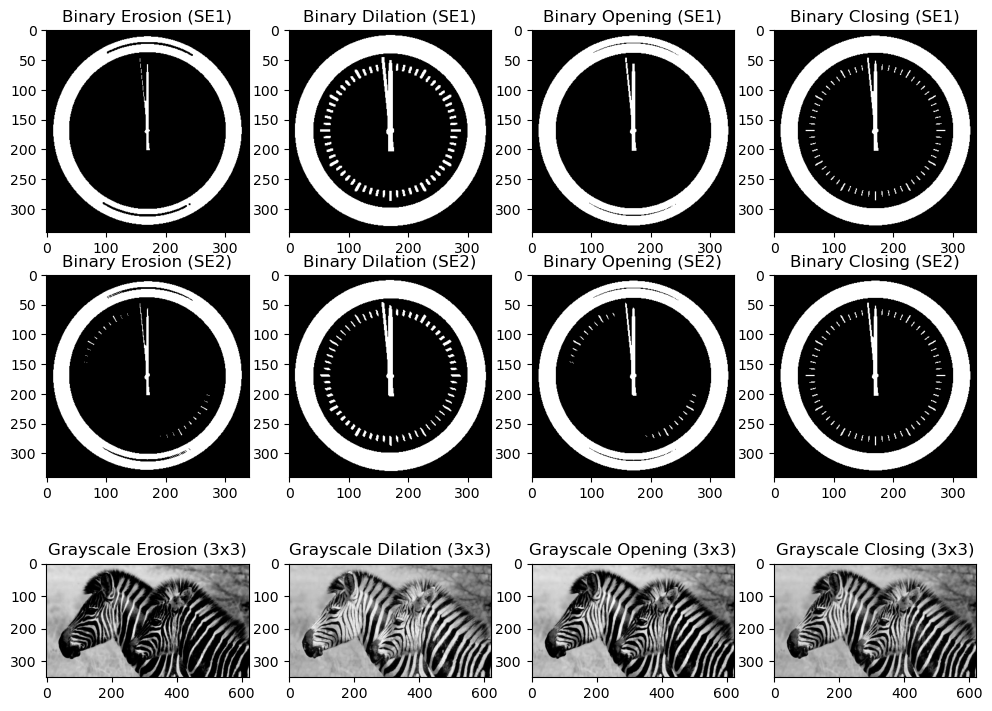

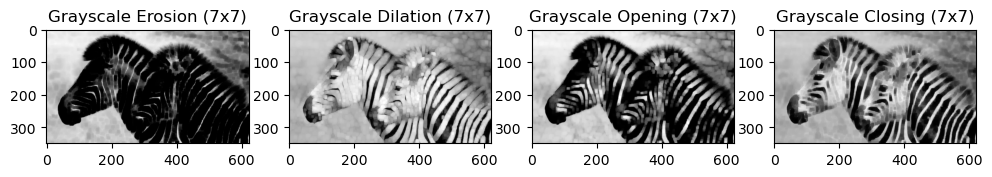

In [29]:

# (a) Load the RGB image clock2.jpg
# convert it to grayscale
# then convert it into a binary image using a threshold of 0.5.
clock2 = imread('images/clock2.jpg')
clock2_gray = rgb2gray(clock2)
clock2_binary = clock2_gray > 0.5

# (b) Use an SE as [1 1 1; 1 1 1; 1 1 1] to obtain the binary morphological erosion，
# dilation, opening and closing of the binary image.
se1 = np.ones((3, 3), dtype=np.uint8)
clock2_erosion_b1 = binary_erosion(clock2_binary, footprint=se1)
clock2_dilation_b1 = binary_dilation(clock2_binary, footprint=se1)
clock2_opening_b1 = binary_opening(clock2_binary, footprint=se1)
clock2_closing_b1 = binary_closing(clock2_binary, footprint=se1)

# (c) Use an SE as [1 0 0; 0 1 0; 0 0 1] to obtain the binary morphological erosion，
# dilation, opening and closing of the binary image.
se2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]], dtype=np.uint8)
clock2_erosion_b2 = binary_erosion(clock2_binary, footprint=se2)
clock2_dilation_b2 = binary_dilation(clock2_binary, footprint=se2)
clock2_opening_b2 = binary_opening(clock2_binary, footprint=se2)
clock2_closing_b2 = binary_closing(clock2_binary, footprint=se2)

# (d) Load the RGB image zebras.jpg, convert it to grayscale.
zebras = imread('images/zebras.jpg')
zebras_gray = rgb2gray(zebras)

# (e) Use a 3x3 SE to obtain the grayscale morphological erosion,
# dilation, opening and closing of grayscale image.
se3 = square(3)
zebras_erosion_g3 = erosion(zebras_gray, footprint=se3)
zebras_dilation_g3 = dilation(zebras_gray, footprint=se3)
zebras_opening_g3 = opening(zebras_gray, footprint=se3)
zebras_closing_g3 = closing(zebras_gray, footprint=se3)

# (f) Use a 7x7 SE to obtain the grayscale morphological erosion,
# dilation, opening and closing of grayscale image.
se4 = square(7)
zebras_erosion_g7 = erosion(zebras_gray, footprint=se4)
zebras_dilation_g7 = dilation(zebras_gray, footprint=se4)
zebras_opening_g7 = opening(zebras_gray, footprint=se4)
zebras_closing_g7 = closing(zebras_gray, footprint=se4)

# Display the results
fig, axes = plt.subplots(3, 4, figsize=(12, 9))

# (b) Binary morphological operations with SE1
axes[0, 0].imshow(clock2_erosion_b1, cmap='gray')
axes[0, 0].set_title('Binary Erosion (SE1)')
axes[0, 1].imshow(clock2_dilation_b1, cmap='gray')
axes[0, 1].set_title('Binary Dilation (SE1)')
axes[0, 2].imshow(clock2_opening_b1, cmap='gray')
axes[0, 2].set_title('Binary Opening (SE1)')
axes[0, 3].imshow(clock2_closing_b1, cmap='gray')
axes[0, 3].set_title('Binary Closing (SE1)')

# (c) Binary morphological operations with SE2
axes[1, 0].imshow(clock2_erosion_b2, cmap='gray')
axes[1, 0].set_title('Binary Erosion (SE2)')
axes[1, 1].imshow(clock2_dilation_b2, cmap='gray')
axes[1, 1].set_title('Binary Dilation (SE2)')
axes[1, 2].imshow(clock2_opening_b2, cmap='gray')
axes[1, 2].set_title('Binary Opening (SE2)')
axes[1, 3].imshow(clock2_closing_b2, cmap='gray')
axes[1, 3].set_title('Binary Closing (SE2)')

# (e) Grayscale morphological operations with 3x3 SE
axes[2, 0].imshow(zebras_erosion_g3, cmap='gray')
axes[2, 0].set_title('Grayscale Erosion (3x3)')
axes[2, 1].imshow(zebras_dilation_g3, cmap='gray')
axes[2, 1].set_title('Grayscale Dilation (3x3)')
axes[2, 2].imshow(zebras_opening_g3, cmap='gray')
axes[2, 2].set_title('Grayscale Opening (3x3)')
axes[2, 3].imshow(zebras_closing_g3, cmap='gray')
axes[2, 3].set_title('Grayscale Closing (3x3)')

# (f) Grayscale morphological operations with 7x7 SE
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes[0].imshow(zebras_erosion_g7, cmap='gray')
axes[0].set_title('Grayscale Erosion (7x7)')
axes[1].imshow(zebras_dilation_g7, cmap='gray')
axes[1].set_title('Grayscale Dilation (7x7)')
axes[2].imshow(zebras_opening_g7, cmap='gray')
axes[2].set_title('Grayscale Opening (7x7)')
axes[3].imshow(zebras_closing_g7, cmap='gray')
axes[3].set_title('Grayscale Closing (7x7)')

plt.show()

### (2) Boundary Extraction and Hole Filling

(a) Load the image boundary.tif. Convert it into a binary image.

(b) Use a 5x5 SE of 1s to obtain the binary morphological erosion of the binary image.

(c) Obtian the boundary of the binary image via performing the difference between the binary image and its erosion image.

(d) Load the image holefiling.tif. Convert it into a binary image.

(e) Fill the holes in binary objects. (Hine:``scipy.ndimage.binary_fill_holes``)

(f) Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

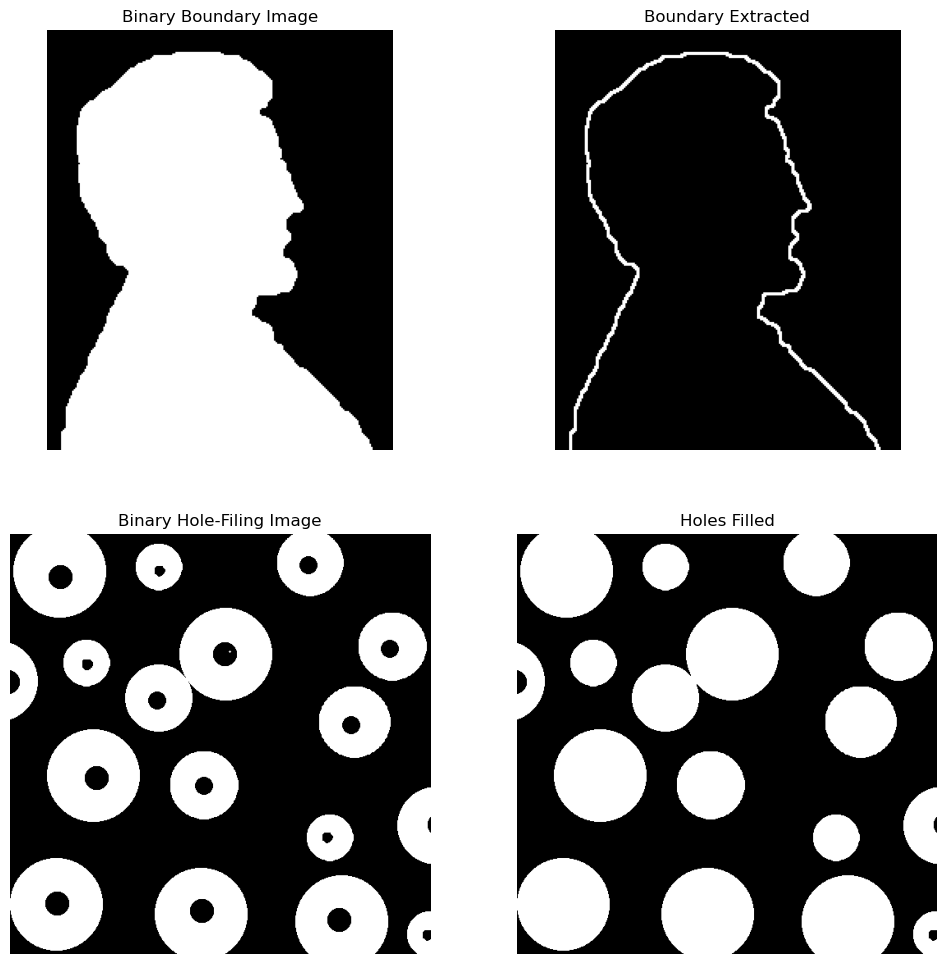

In [30]:

# Function to load and binarize image
def load_and_binarize_image(filename):
    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image '{filename}' not found.")
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return binary_image

# Step (a): Load the image and convert it to a binary image
binary_boundary_image = load_and_binarize_image('images/boundary.tif')

# Step (b): Perform binary morphological erosion using a 5x5 SE of 1s
se = np.ones((5, 5), dtype=np.uint8)
eroded_image = cv2.erode(binary_boundary_image, se)

# Step (c): Obtain the boundary by subtracting the eroded image from the original binary image
boundary_extracted = cv2.subtract(binary_boundary_image, eroded_image)

# Step (d): Load the image and convert it to a binary image
binary_holefiling_image = load_and_binarize_image('images/holefiling.tif')

# Step (e): Fill the holes in binary objects
holes_filled_image = binary_fill_holes(binary_holefiling_image // 255).astype(np.uint8) * 255

# Step (f): Display the images in sub-figures
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Original boundary image
axes[0, 0].imshow(binary_boundary_image, cmap='gray')
axes[0, 0].set_title('Binary Boundary Image')
axes[0, 0].axis('off')

# Binary boundary image with boundary extracted
axes[0, 1].imshow(boundary_extracted, cmap='gray')
axes[0, 1].set_title('Boundary Extracted')
axes[0, 1].axis('off')

# Original hole-filing image
axes[1, 0].imshow(binary_holefiling_image, cmap='gray')
axes[1, 0].set_title('Binary Hole-Filing Image')
axes[1, 0].axis('off')

# Hole-filled binary image
axes[1, 1].imshow(holes_filled_image, cmap='gray')
axes[1, 1].set_title('Holes Filled')
axes[1, 1].axis('off')

plt.show()


### (3) Thining and Convex Hull
(a) Load the image CT.tif. Convert it into a binary image.

(b) Perform morphological thinning of a binary image. (Hint:``skimage.morphology.thin``, set the parameter of max_iter to 5, 50, and none, respectively.</font>)

(c) Compute the convex hull image of a binary image. (Hint:``skimage.morphology.convex_hull_image``)

(d) Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

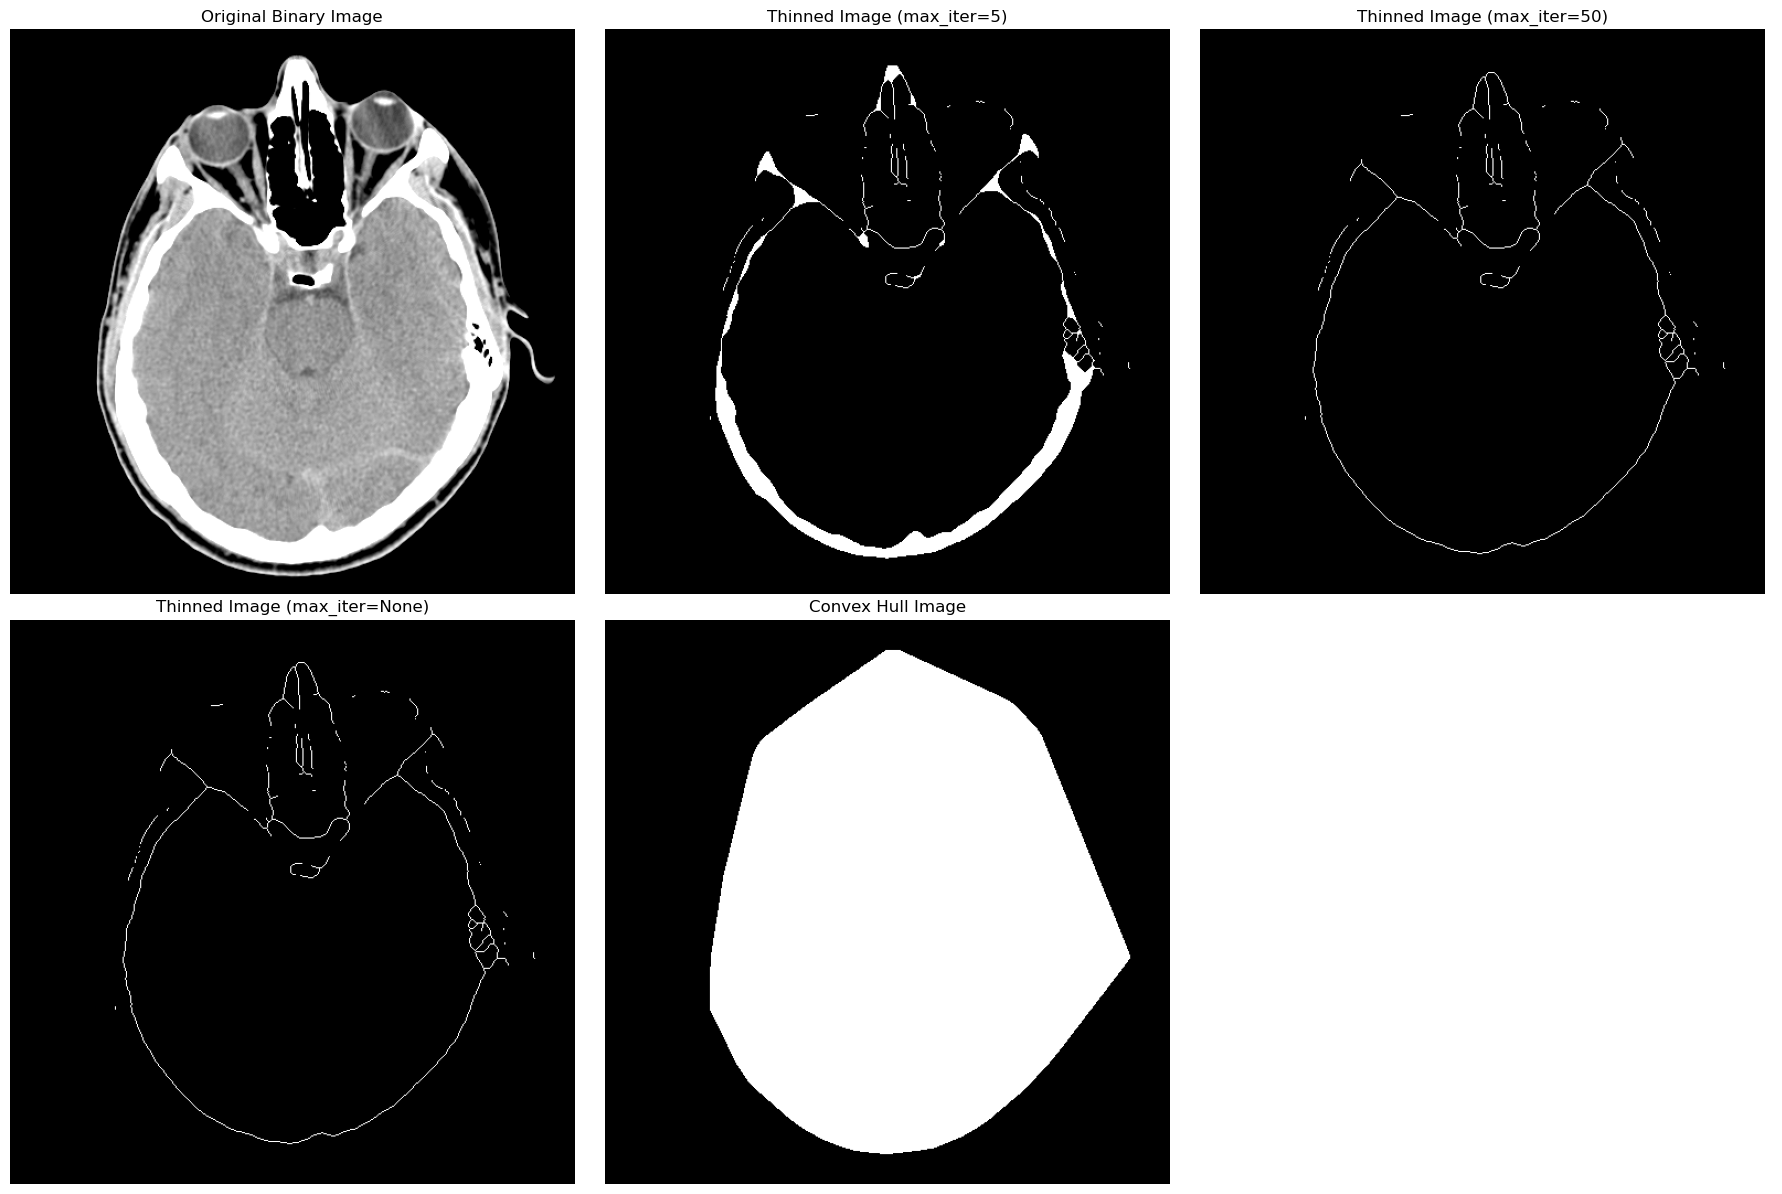

In [31]:

# Step (a): Load the image and convert it to a binary image
binary_image = cv2.imread('images/CT.tif',cv2.IMREAD_GRAYSCALE)

# Step (b): Perform morphological thinning with different iteration values
thinned_5 = thin(binary_image // 255, max_num_iter=5)
thinned_50 = thin(binary_image // 255, max_num_iter=50)
thinned_none = thin(binary_image // 255)

# Step (c): Compute the convex hull image
convex_hull = convex_hull_image(binary_image // 255)

# Step (d): Display the images in sub-figures
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Original binary image
axes[0, 0].imshow(binary_image, cmap='gray')
axes[0, 0].set_title('Original Binary Image')
axes[0, 0].axis('off')

# Thinned image with max_iter=5
axes[0, 1].imshow(thinned_5, cmap='gray')
axes[0, 1].set_title('Thinned Image (max_iter=5)')
axes[0, 1].axis('off')

# Thinned image with max_iter=50
axes[0, 2].imshow(thinned_50, cmap='gray')
axes[0, 2].set_title('Thinned Image (max_iter=50)')
axes[0, 2].axis('off')

# Thinned image with max_iter=None
axes[1, 0].imshow(thinned_none, cmap='gray')
axes[1, 0].set_title('Thinned Image (max_iter=None)')
axes[1, 0].axis('off')

# Convex hull image
axes[1, 1].imshow(convex_hull, cmap='gray')
axes[1, 1].set_title('Convex Hull Image')
axes[1, 1].axis('off')

# Empty subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


### (4) Top-hat (white top-hat) and Bottom-hat (black top-hat) Transformation

(a) Load the grayscale image rice.tif. Convert it into a binary image with a threshold of 0.5.

(b) Perform top-hat transformation to the grayscale image. (Hint:``skimage.morphology.white_tophat``, set the parameter of footprint to ``skimage.morphology.square(81)``)

(c) Obtain thresholded top-hat image and convert it into a binary image.

(d) Perform bottom-hat transformation to the grayscale image. (Hint:``skimage.morphology.black_tophat``, set the parameter of footprint to ``skimage.morphology.square(81)``)

(e) Obtain thresholded bottom-hat image and convert it into a binary image.

(f) Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.


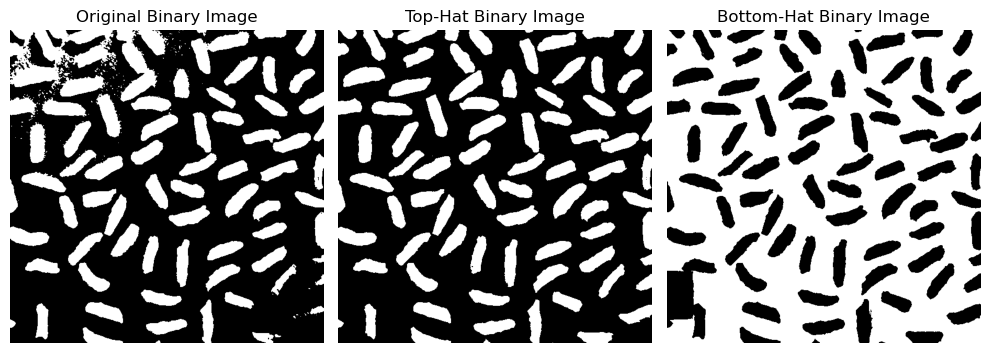

In [32]:

# Step (a): Load the grayscale image and convert it into a binary image
grayscale_image = cv2.imread('images/rice.tif', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(grayscale_image, 127, 255, cv2.THRESH_BINARY)

# Step (b): Perform top-hat transformation with a square footprint of size 81
top_hat = white_tophat(grayscale_image, square(81))

# Step (c): Threshold the top-hat image to obtain a binary image
threshold_top_hat = top_hat > threshold_otsu(top_hat)

# Step (d): Perform bottom-hat transformation with a square footprint of size 81
bottom_hat = black_tophat(grayscale_image, square(81))

# Step (e): Threshold the bottom-hat image to obtain a binary image
threshold_bottom_hat = bottom_hat > threshold_otsu(bottom_hat)

# Step (f): Display the images in sub-figures
fig, axes = plt.subplots(1, 3, figsize=(10, 10))

# Original binary image
axes[0].imshow(binary_image, cmap='gray')
axes[0].set_title('Original Binary Image')
axes[0].axis('off')

# Top-hat binary image
axes[1].imshow(threshold_top_hat, cmap='gray')
axes[1].set_title('Top-Hat Binary Image')
axes[1].axis('off')

# Bottom-hat binary image
axes[2].imshow(threshold_bottom_hat, cmap='gray')
axes[2].set_title('Bottom-Hat Binary Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()


### (5) Edge Detection
(a) Load the image building.tif. 

(b) Find edges in an image using the Roberts' cross operators, Sobel operators, Prewitt operators, and the Canny algorithm. (Hint:``skimage.filters.roberts``, ``skimage.filters.sobel``,  ``skimage.filters.prewitt``, ``skimage.feature.canny``)

(c) Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

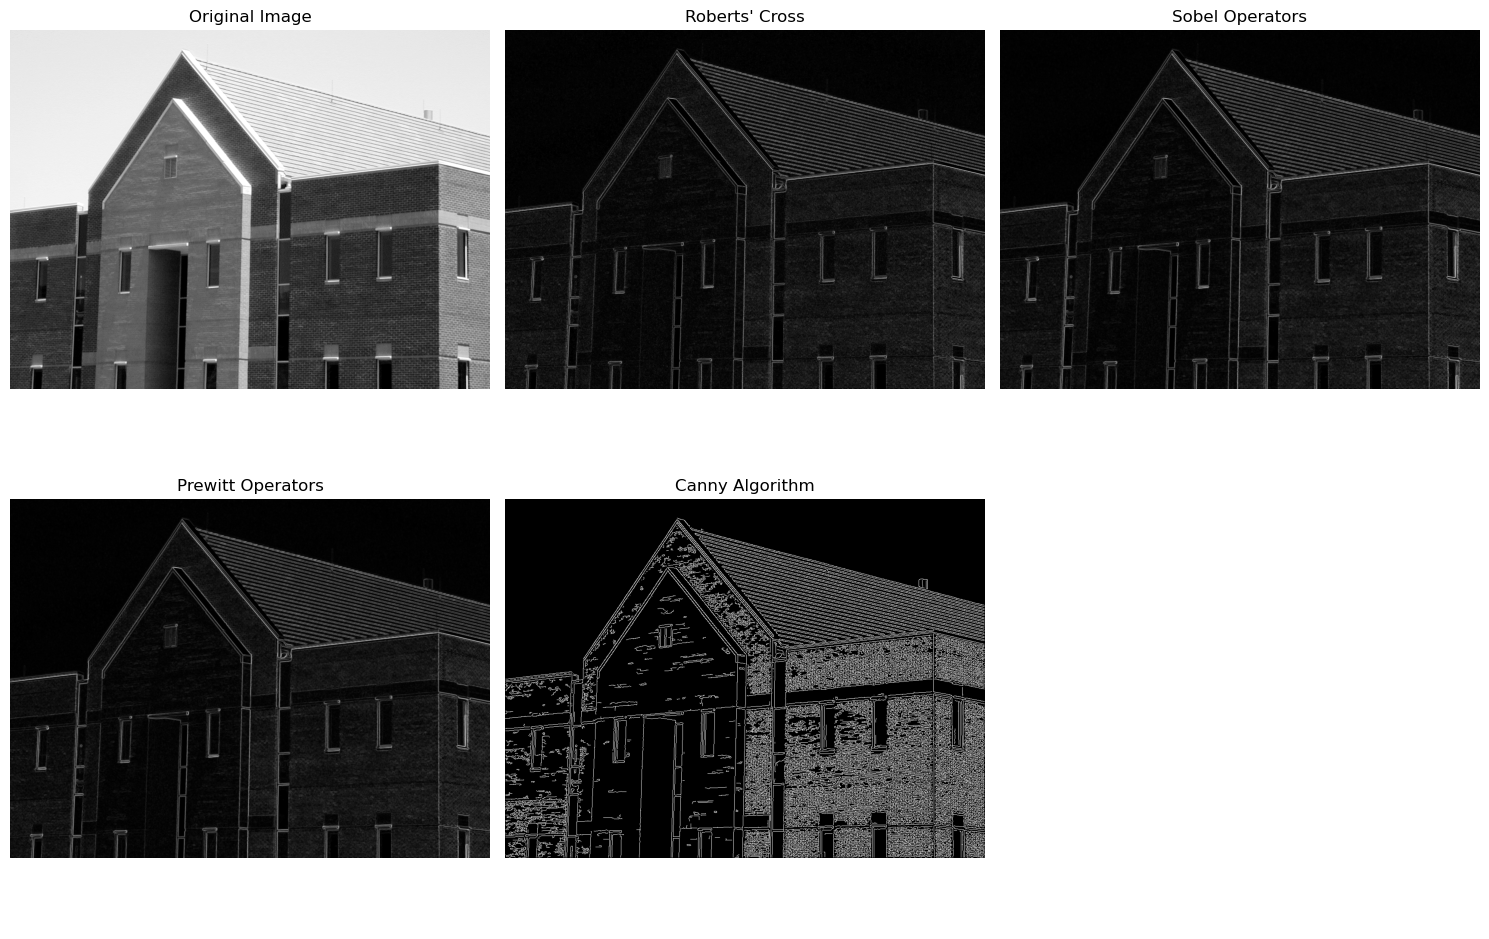

In [33]:

# Step (a): Load the image
image = io.imread('images/building.tif')

# Step (b): Find edges using different methods
roberts = filters.roberts(image)
sobel = filters.sobel(image)
prewitt = filters.prewitt(image)
canny = feature.canny(image)

# Step (c): Display the results in sub-figures
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Roberts' cross operators
axes[0, 1].imshow(roberts, cmap='gray')
axes[0, 1].set_title("Roberts' Cross")
axes[0, 1].axis('off')

# Sobel operators
axes[0, 2].imshow(sobel, cmap='gray')
axes[0, 2].set_title('Sobel Operators')
axes[0, 2].axis('off')

# Prewitt operators
axes[1, 0].imshow(prewitt, cmap='gray')
axes[1, 0].set_title('Prewitt Operators')
axes[1, 0].axis('off')

# Canny algorithm
axes[1, 1].imshow(canny, cmap='gray')
axes[1, 1].set_title('Canny Algorithm')
axes[1, 1].axis('off')

# Empty subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


### (6) Edge-Based Segmentation
(a) Load the coins image in skimage. (Hint:``skimage.data.coins()``)

(b) Use Canny algorithm to obtain the edge image. (Hint:``skimage.feature.canny``, set the parameter of sigma to 3)

(c) Fill the holes to obtain the segmented image. (Hint:``scipy.ndimage.binary_fill_holes``)

(c) Display the images in the same figure with sub-figures. Add the corresponding title to the sub-figure.

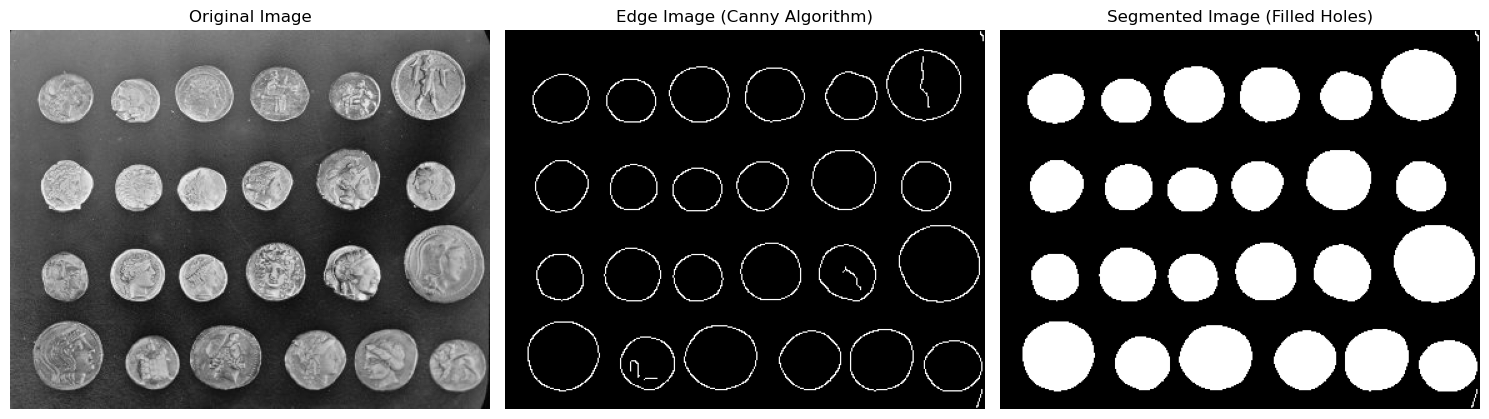

In [34]:

# Step (a): Load the coins image
coins_image = data.coins()

# Step (b): Use Canny algorithm to obtain the edge image
edge_image = feature.canny(coins_image, sigma=3)

# Step (c): Fill the holes to obtain the segmented image
segmented_image = ndimage.binary_fill_holes(edge_image)

# Step (d): Display the images in sub-figures
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original image
axes[0].imshow(coins_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Edge image
axes[1].imshow(edge_image, cmap='gray')
axes[1].set_title('Edge Image (Canny Algorithm)')
axes[1].axis('off')

# Segmented image
axes[2].imshow(segmented_image, cmap='gray')
axes[2].set_title('Segmented Image (Filled Holes)')
axes[2].axis('off')

plt.tight_layout()
plt.show()


### (7) Hough transform
(a) Load the image triangle_circle.png. Convert it to grayscale.

(b) Perform a straight line Hough transform to the grayscale image. (Hint:``skimage.transform.hough_line``)

(c) Obtain the peaks in a straight line Hough transform. (Hint:``skimage.transform.hough_line_peaks``)

(d) Highlight the detected lines by red color. (Hint:``matplotlib.pyplot.axline``)

(e) Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.



/var/folders/w2/_7wpt6ns5jv5nz_p7nz1_4m00000gn/T/ipykernel_63075/1518583325.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
/var/folders/w2/_7wpt6ns5jv5nz_p7nz1_4m00000gn/T/ipykernel_63075/1518583325.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  y1 = (dist - gray_image.shape[1] * np.cos(angle)) / np.sin(angle)


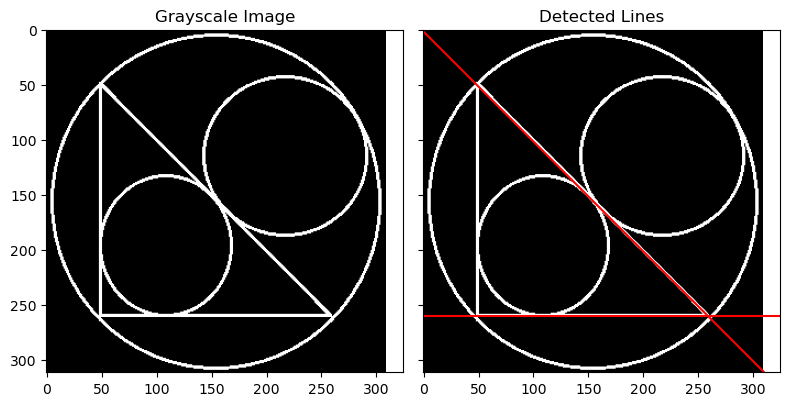

In [42]:

# Load the image
image = io.imread('images/triangle_circle.png')

# Remove the alpha channel if present
if image.shape[2] == 4:
    image = image[:, :, :3]

# Convert the image to grayscaleX
gray_image = color.rgb2gray(image)

# Perform the Hough transform
hough_space, angles, dists = transform.hough_line(gray_image)

# Find the peaks in the Hough transform
hough_peaks = transform.hough_line_peaks(hough_space, angles, dists)

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title('Grayscale Image')

ax[1].imshow(gray_image, cmap='gray')
for _, angle, dist in zip(*hough_peaks):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - gray_image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[1].axline((0, y0), (gray_image.shape[1], y1), color='red')
ax[1].set_title('Detected Lines')

plt.tight_layout()
plt.show()


### (8) Thresholding-Based Segmentation 
(a) Load the image shade_text1.tif. 

(b) Perform automatic image thresholding by Otsu's method to get the threshold value. (Hint:``skimage.filters.threshold_otsu``)

(c) Transform the grayscale image into a binary image using the threshold value obtained by Otsu's method.

(d) Compute a moving average threshold. (Hint:``cv2.blur``)

(e) Obtain the result of local thresholding using moving averages.

(f) Display them in the same figure with sub-figures. Add the corresponding title to the sub-figure.

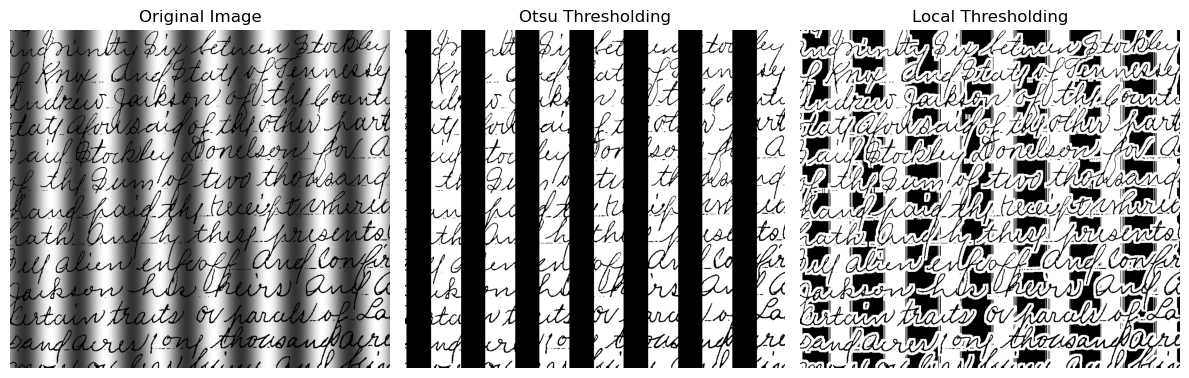

In [16]:
 
# (a) Load the image shade_text1.tif
image_path = 'images/shade_text1.tif'
image = io.imread(image_path, as_gray=True)

# (b) Perform automatic image thresholding by Otsu's method
threshold_otsu = filters.threshold_otsu(image)

# (c) Transform the grayscale image into a binary image using the threshold value obtained by Otsu's method
binary_image_otsu = image > threshold_otsu

# (d) Compute a moving average threshold
moving_avg_threshold = cv2.blur(image, (11, 11))

# (e) Obtain the result of local thresholding using moving averages
local_thresholding = image > moving_avg_threshold

# (f) Display them in the same figure with sub-figures
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Binary image using Otsu's method
plt.subplot(1, 3, 2)
plt.imshow(binary_image_otsu, cmap='gray')
plt.title('Otsu Thresholding')
plt.axis('off')

# Local thresholding using moving averages
plt.subplot(1, 3, 3)
plt.imshow(local_thresholding, cmap='gray')
plt.title('Local Thresholding')
plt.axis('off')

plt.tight_layout()
plt.show()


### (9) Image Processing Software with GUI

* Use QT or other tools to design an image processing toolbox with GUI. There is no limitation on implementations. 

* The GUI contain at least one basic image processing function, can it can display the input image and the processed image.

* <font color=Blue>Submit a video recording to demonstrate the function of your GUI design in your report.</font>

In [ ]:
# This is code,and the video is in the attachment.

import sys
import cv2
import numpy as np
from PyQt5.QtWidgets import QApplication, QWidget, QHBoxLayout, QVBoxLayout, QPushButton, QLabel, QFileDialog, QSizePolicy
from PyQt5.QtGui import QPixmap, QImage
from PyQt5.QtCore import Qt
from skimage.morphology import thin, convex_hull_image


class ImageProcessingApp(QWidget):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        # 主布局
        main_layout = QVBoxLayout()

        # 导入按钮布局
        import_button_layout = QHBoxLayout()

        self.loadButton = QPushButton('Load Image')
        self.loadButton.clicked.connect(self.loadImage)
        import_button_layout.addWidget(self.loadButton)

        self.saveButton = QPushButton('Save Processed Image')
        self.saveButton.clicked.connect(self.saveImage)
        import_button_layout.addWidget(self.saveButton)

        self.clearButton = QPushButton('Clear Images')
        self.clearButton.clicked.connect(self.clearImages)
        import_button_layout.addWidget(self.clearButton)

        # 功能按钮布局
        function_button_layout = QHBoxLayout()

        self.grayButton = QPushButton('Convert to Grayscale')
        self.grayButton.clicked.connect(self.convertToGrayscale)
        function_button_layout.addWidget(self.grayButton)

        self.binaryButton = QPushButton('Binary Thresholding')
        self.binaryButton.clicked.connect(self.applyBinary)
        function_button_layout.addWidget(self.binaryButton)

        self.edgeButton = QPushButton('Edge Detection')
        self.edgeButton.clicked.connect(self.applyEdge)
        function_button_layout.addWidget(self.edgeButton)

        self.gaussianBlurButton = QPushButton('Gaussian Blur')
        self.gaussianBlurButton.clicked.connect(self.applyGaussianBlur)
        function_button_layout.addWidget(self.gaussianBlurButton)

        self.thinningButton = QPushButton('Morphological Thinning')
        self.thinningButton.clicked.connect(self.applyThinning)
        function_button_layout.addWidget(self.thinningButton)


        # 将按钮布局添加到主布局
        main_layout.addLayout(import_button_layout)
        main_layout.addLayout(function_button_layout)

        # 图片显示布局
        image_layout = QHBoxLayout()

        self.inputImageLabel = QLabel(self)
        self.inputImageLabel.setSizePolicy(QSizePolicy.Expanding, QSizePolicy.Expanding)
        self.inputImageLabel.setAlignment(Qt.AlignCenter)
        image_layout.addWidget(self.inputImageLabel)

        self.outputImageLabel = QLabel(self)
        self.outputImageLabel.setSizePolicy(QSizePolicy.Expanding, QSizePolicy.Expanding)
        self.outputImageLabel.setAlignment(Qt.AlignCenter)
        image_layout.addWidget(self.outputImageLabel)

        # 将图片布局添加到主布局
        main_layout.addLayout(image_layout)

        self.setLayout(main_layout)
        self.setWindowTitle('Image Processing Toolbox')
        self.setGeometry(100, 100, 1200, 600)  # 初始窗口大小
        self.show()

    def loadImage(self):
        options = QFileDialog.Options()
        fileName, _ = QFileDialog.getOpenFileName(self, "Load Image", "", "Image Files (*.png *.jpg *.bmp *.tif)", options=options)
        if fileName:
            self.image = cv2.imread(fileName)
            self.image = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)  # 转换为RGB格式
            self.displayImage(self.image, self.inputImageLabel)
            self.adjustWindowSize(self.image)

    def saveImage(self):
        if hasattr(self, 'processed_image'):
            options = QFileDialog.Options()
            saveFileName, _ = QFileDialog.getSaveFileName(self, "Save Processed Image", "", "Image Files (*.png *.jpg *.bmp *.tif)", options=options)
            if saveFileName:
                cv2.imwrite(saveFileName, cv2.cvtColor(self.processed_image, cv2.COLOR_RGB2BGR))

    def clearImages(self):
        self.inputImageLabel.clear()
        self.outputImageLabel.clear()
        if hasattr(self, 'image'):
            del self.image
        if hasattr(self, 'processed_image'):
            del self.processed_image

    def convertToGrayscale(self):
        if hasattr(self, 'image'):
            gray_image = cv2.cvtColor(self.image, cv2.COLOR_RGB2GRAY)
            self.processed_image = gray_image
            self.displayImage(gray_image, self.outputImageLabel, is_gray=True)
            self.adjustWindowSize(gray_image)

    def applyBinary(self):
        if hasattr(self, 'image'):
            gray_image = cv2.cvtColor(self.image, cv2.COLOR_RGB2GRAY)
            _, binary_image = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)
            self.processed_image = binary_image
            self.displayImage(binary_image, self.outputImageLabel, is_gray=True)
            self.adjustWindowSize(binary_image)

    def applyEdge(self):
        if hasattr(self, 'image'):
            gray_image = cv2.cvtColor(self.image, cv2.COLOR_RGB2GRAY)
            _, binary_image = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)

            # 使用5x5的结构元素进行形态学侵蚀
            se = np.ones((5, 5), np.uint8)
            erosion_image = cv2.erode(binary_image, se, iterations=1)

            # 通过二值图像与其侵蚀图像之间的差异获得边界
            edges = binary_image - erosion_image

            self.processed_image = edges
            self.displayImage(edges, self.outputImageLabel, is_gray=True)
            self.adjustWindowSize(edges)

    def applyGaussianBlur(self):
        if hasattr(self, 'image'):
            blurred_image = cv2.GaussianBlur(self.image, (15, 15), 0)
            self.processed_image = blurred_image
            self.displayImage(blurred_image, self.outputImageLabel)
            self.adjustWindowSize(blurred_image)

    from skimage.morphology import thin, convex_hull_image

    def applyThinning(self):
        if hasattr(self, 'image'):
            gray_image = cv2.cvtColor(self.image, cv2.COLOR_RGB2GRAY)
            _, binary_image = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)
            thinned_image = thin(binary_image // 255, max_num_iter=5)
            self.processed_image = (thinned_image * 255).astype(np.uint8)
            self.displayImage(self.processed_image, self.outputImageLabel, is_gray=True)
            self.adjustWindowSize(self.processed_image)

    def displayImage(self, image, label, is_gray=False):
        if is_gray:
            image = (image * 255).astype(np.uint8) if image.max() <= 1 else image
            image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
        else:
            if image.dtype == np.float64:
                image = (image * 255).astype(np.uint8)

        height, width = image.shape[:2]

        # 调整图像大小，保持纵横比
        max_size = 500
        min_size = 300
        scaling_factor = min(max_size / max(height, width), 1)
        scaling_factor = max(min_size / min(height, width), scaling_factor)
        new_height = int(height * scaling_factor)
        new_width = int(width * scaling_factor)

        qImg = QImage(image.data, width, height, 3 * width, QImage.Format_RGB888)
        pixmap = QPixmap.fromImage(qImg)
        pixmap = pixmap.scaled(new_width, new_height, Qt.KeepAspectRatio)

        label.setPixmap(pixmap)
        label.setFixedSize(new_width, new_height)
        label.setAlignment(Qt.AlignCenter)

    def adjustWindowSize(self, image):
        screen_width = 1200 + 50
        screen_height = 600 + 50

        height, width = image.shape[:2]

        max_window_height = min(screen_height, 1100)
        max_window_width = min(screen_width, 1400)

        scaling_factor = min(max_window_height / height, max_window_width / (2 * width))

        new_height = int(height * scaling_factor)
        new_width = int(width * scaling_factor)

        # 计算新的窗口大小，包含按钮区域
        window_height = new_height + 30
        window_width = new_width * 2 + 20

        # 确保窗口尺寸不超过最大值
        window_height = min(window_height, max_window_height)
        window_width = min(window_width, max_window_width)

        self.setFixedSize(window_width, window_height)

if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = ImageProcessingApp()
    sys.exit(app.exec_())


## 3.	Requirements of Experiment Report ##
#### (1) Use the Jupyter Notebook to write and test codes. 
#### (2) Display the results in the Jupyter Notebook.
#### (3) Sumbit the report according to the template including the corresponding codes and results. 
#### (4) The report is required to be tidy with clear procedures.
#### (5) The codes should be concise and give some necessary comments.